# Linked List Visualization Tool
- This is a tool to learn how the basic operations take place in a linked list.
- graphviz is an awesome library to do graph visualization. This is what has been used here to create the linked list svg images

### Installation

In [1]:
# pip install graphviz  # uncomment this if graphviz is not installed

Note: you may need to restart the kernel to use updated packages.


## Implementation

In [2]:
from graphviz import Digraph

### The Node Class or simply The Node

In [3]:
# The Node Class
class Node:
    def __init__(self, data: int=0, next=None):
        self.data = data
        self.next = next
    def __repr__(self):
        return f"Node({self.data} , {self.next})"

### The Linked List Class

In [6]:
# The Linked List Class
class LinkedList(Node):
    def __init__(self, head:Node=None):
        self.head = head
    
    def __repr__(self):
        return f"LinkedList({self.head.data}, {self.head.next})"
    
    def push_back(self, data=None, node=None):
        if data is None and node is None:
            return None, None
        
        temp = self.head
        dot_before = self.traverse()
        if temp is None:
            if data:
                self.head = Node(data)
            else:
                self.head = node
            
            dot_before.node(name=str(id(self.head)), label="%d" %(self.head.data), shape='circle')
            dot_after = dot_before.copy()
            
            return dot_before, dot_after
        
        # get to the last node
        pre = None
        while temp.next:
            temp = temp.next
            
        if data is not None:
            temp.next = Node(data)
        else:
            temp.next = node
            
        pre = temp
        temp = temp.next
        
        dot_before.node(name=str(id(temp)), label="%d" %(temp.data), shape='circle')
        dot_after = dot_before.copy()
        dot_after.edge(str(id(pre)), str(id(temp)))
        
        return dot_before, dot_after
    
    def push_front(self, data=None, node=None):
        if data is None and node is None:
            return None, None
        
        temp = self.head
        dot_before = self.traverse()
        
        if temp is None:
            if data:
                self.head = Node(data)
            else:
                self.head = node
            
            dot_before.node(name=str(id(self.head)), label="%d" %(self.head.data), shape='circle')
            dot_after = dot_before.copy()
            
            return dot_before, dot_after
                
    
        if data is not None:
            new_node = Node(data)
        else:
            new_node = node

        dot_before.node(name=str(id(new_node)), label="%d" %(new_node.data), shape='circle')
        dot_after = dot_before.copy()
        
        new_node.next = self.head
        self.head = new_node
        
        dot_after.edge(str(id(self.head)), str(id(self.head.next)))

        return dot_before, dot_after
    
    def pop_back(self):
        temp = self.head
        if temp is None:
            return None, None
        
        dot_before = self.traverse()
        dot_after = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
        
        # get access to second last node
        pre = None
        while temp.next:
            pre = temp
            dot_after.node(name=str(id(pre)), label="%d" %(pre.data), shape='circle')
            temp = temp.next
        if pre:
            pre.next = None
        else:
            self.head = None
        
        temp = self.head
        if temp is None:
            dot_after.label="None"
            return dot_before, dot_after
        
        while temp.next:
            dot_after.edge(str(id(temp)), str(id(temp.next)))
            temp = temp.next
            
        return dot_before, dot_after
    
    def pop_front(self):
        temp = self.head
        if temp is None:
            return None, None
        
        dot_before = self.traverse()
        dot_after = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
        
        self.head = self.head.next
        if self.head is None:
            dot_after.label = "None"
            return dot_before, dot_after
        
        temp = self.head
        while temp:
            dot_after.node(name=str(id(temp)), label="%d" %(temp.data), shape='circle')
            temp = temp.next
        
        temp = self.head
        while temp.next:
            dot_after.edge(str(id(temp)), str(id(temp.next)))
            temp = temp.next
        
        return dot_before, dot_after
            
    def insert(self, data=None, node=None, position=0):
        if data is None and node is None:
            return None, None
        
        if position == 0:
            return self.push_back(data=data)
        
        dot_before = self.traverse()
        
        if data:
            new_node = Node(data)
        else:
            new_node = node
            
        dot_before.node(name=str(id(new_node)), label="%d" %(new_node.data), shape='circle')
        
        temp = self.head
        pre = None
        # find the position to add 
        for i in range(position):
            pre = temp
            temp = temp.next
            if temp is None:
                break
        
        pre.next = new_node
        new_node.next = temp
        
        dot_after = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
        
        # fill nodes in the graph
        temp = self.head
        while temp:
            dot_after.node(name=str(id(temp)), label="%d" %(temp.data), shape='circle')
            temp = temp.next
        
        # connect the edges
        temp = self.head
        while temp.next:
            dot_after.edge(str(id(temp)), str(id(temp.next)))
            temp = temp.next
        
        return dot_before, dot_after
    
    def delete(self, position=0):        
        if (position == 0) or (self.head is None) or (self.head.next is None):
            return self.pop_front()
        
        dot_before = self.traverse()
        
        # go to the target node
        pre = None
        temp = self.head
        for i in range(position):

            # if position exceeds the number of nodes
            if temp.next is None:
                break
            pre = temp
            temp = temp.next
        
        pre.next = temp.next
        
        dot_after = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
        
        # fill the nodes in the after_delete digraph
        temp = self.head
        while temp:
            dot_after.node(name=str(id(temp)), label="%d" %(temp.data), shape='circle')
            temp = temp.next
        
        # connect the edges
        temp = self.head
        while temp.next:
            dot_after.edge(str(id(temp)), str(id(temp.next)))
            temp = temp.next
        
        return dot_before, dot_after
        
        
    def traverse(self):
        temp = self.head
        if temp is None:
            return Digraph(format='svg', graph_attr={'rankdir': 'LR'})
        
        dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
        
        while temp:
            dot.node(name=str(id(temp)), label="%d" %(temp.data), shape='circle')
            temp = temp.next
            
        temp = self.head
        while temp.next:
            dot.edge(str(id(temp)), str(id(temp.next)))
            temp =  temp.next
        
        return dot


## Demonstration
- A simple demonstration to show how to use the class

In [63]:
my_list = LinkedList(Node(5))

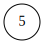

In [64]:
my_list.traverse() # returns a diagraph object in svg format to show the linked list

In [65]:
# lets push some data
for i in range(10, 30, 5):
    my_list.push_back(data=i)

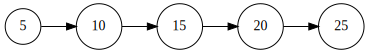

In [66]:
my_list.traverse()

In [67]:
# lets see how a node is pushed back in a general linked list
# 1. Let's push a node via data
data_to_push = 30
before_push, after_push = my_list.push_back(data=data_to_push)

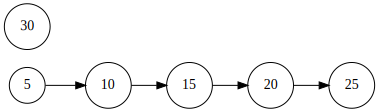

In [68]:
before_push

As You can see, a node with data 30 has been created but has not been linked with our linked list

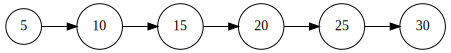

In [69]:
after_push

Now, the node with data 30, has been linked with our linked list

In [70]:
# We can also push_back a node
node_to_push = Node(35)
before_push, after_push = my_list.push_back(node=node_to_push)

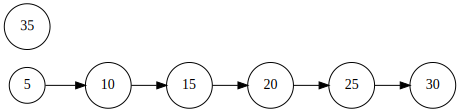

In [71]:
before_push

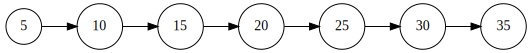

In [72]:
after_push

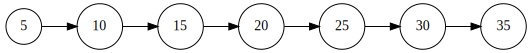

In [73]:
my_list.traverse()

In [74]:
# lets see how a node is pushed in front of a general linked list
node_to_push = Node(40) # Note: you can as push by data using my_list.push_front(data=40)
before_push, after_push = my_list.push_front(node=node_to_push)

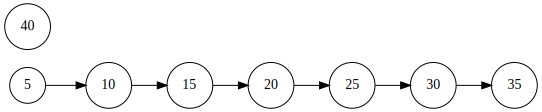

In [75]:
before_push

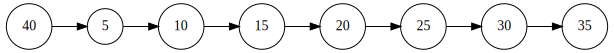

In [76]:
after_push

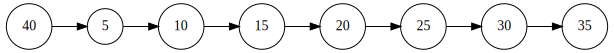

In [77]:
my_list.traverse()

In [78]:
# lets pop a node from back
before_pop, after_pop = my_list.pop_back()

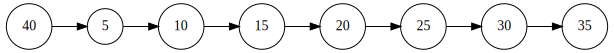

In [79]:
before_pop

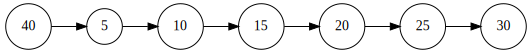

In [80]:
after_pop

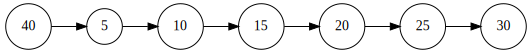

In [81]:
my_list.traverse()

In [82]:
# lets pop a node from front
before_pop, after_pop = my_list.pop_front()

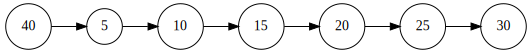

In [83]:
before_pop

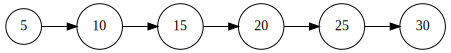

In [84]:
after_pop

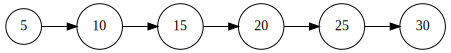

In [85]:
my_list.traverse()

In [86]:
# Now lets insert a node at a given position
before_insert, after_insert = my_list.insert(data=50, position=2)

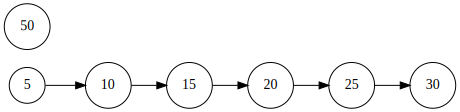

In [87]:
before_insert

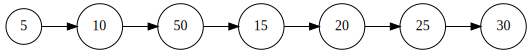

In [88]:
after_insert

In [89]:
# Now lets delete a node from a given position
before_delete, after_delete = my_list.delete(position=3)

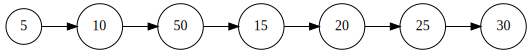

In [90]:
before_delete

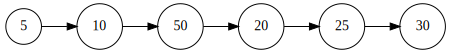

In [91]:
after_delete

In [ ]:
my_list.traverse()

## Now the stage is all yours!